# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from meteostat import Point, Daily
pd.set_option('display.max_columns', None)

In [2]:
data_raw = pd.read_csv('C://Users//ryana//Downloads//constructiondata//US_Constructions_Dec21.csv')

# Initial Exploration

In [3]:
data = data_raw.copy()
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,C-1,4,2019-04-05 16:00:00.000000000,2020-09-29 11:53:57.000000000,32.838360,-93.152378,32.850740,-93.164388,1.103497,Construction on LA-534 WB near EDMONDS LOOP Ro...,4200.0,Highway 534,R,Haynesville,Claiborne,LA,71038-7130,US,US/Central,KMNE,2019-04-05 15:55:00,75.0,75.0,58.0,29.72,10.0,S,3.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,C-2,2,2021-11-12 07:59:00.000000000,2021-11-12 08:22:30.000000000,30.221331,-92.008625,30.216642,-92.003809,0.433173,Slow traffic on US-90 E from US-167/Louisiana ...,1098.0,SW Evangeline Trwy,R,Lafayette,Lafayette,LA,70501-8244,US,US/Central,KLFT,2021-11-12 07:59:00,55.0,55.0,100.0,30.09,3.0,CALM,0.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,C-3,2,2021-10-12 07:17:30.000000000,2021-10-12 09:18:55.000000000,39.653153,-104.910224,39.653120,-104.913838,0.192266,Slow traffic on CO-30 from S Tamarac Dr (E Ham...,6779.0,E Hampden Ave,R,Denver,Denver,CO,80224-3007,US,US/Mountain,KBKF,2021-10-12 06:58:00,37.0,33.0,82.0,24.09,10.0,WSW,5.0,0.0,Partly Cloudy,False,False,True,False,False,False,False,False,True,False,False,False,False,Day,Day,Day,Day
3,C-4,4,2021-02-10 02:46:10.000000000,2021-02-17 23:59:00.000000000,33.961506,-118.029339,33.961919,-118.029082,0.032112,Closed road from Whittier to College Ave due t...,13585.0,Whittier Blvd,L,Whittier,Los Angeles,CA,90605-1935,US,US/Pacific,KFUL,2021-02-10 02:53:00,54.0,54.0,83.0,29.92,9.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
4,C-5,2,2020-09-24 15:58:00.000000000,2020-09-25 21:04:54.000000000,40.008734,-79.599696,40.022822,-79.595703,0.996057,Construction on US-119 NB near SAMPSON ST Allo...,1144.0,Schley St,R,Connellsville,Fayette,PA,15425-2945,US,US/Eastern,KLBE,2020-09-24 15:53:00,73.0,73.0,NaN,28.78,10.0,SSW,7.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
#47 variables for about 6 million cases
data.shape

(6170627, 47)

In [5]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
for column in data:
    print(column + ": " + str(data[column].isnull().sum()))

ID: 0
Severity: 0
Start_Time: 0
End_Time: 0
Start_Lat: 0
Start_Lng: 0
End_Lat: 634048
End_Lng: 634048
Distance(mi): 0
Description: 0
Number: 2674829
Street: 6
Side: 0
City: 288
County: 0
State: 0
Zipcode: 2344
Country: 0
Timezone: 5106
Airport_Code: 15859
Weather_Timestamp: 83786
Temperature(F): 115394
Wind_Chill(F): 776566
Humidity(%): 122560
Pressure(in): 104318
Visibility(mi): 142246
Wind_Direction: 162549
Wind_Speed(mph): 340277
Precipitation(in): 922444
Weather_Condition: 138203
Amenity: 0
Bump: 0
Crossing: 0
Give_Way: 0
Junction: 0
No_Exit: 0
Railway: 0
Roundabout: 0
Station: 0
Stop: 0
Traffic_Calming: 0
Traffic_Signal: 0
Turning_Loop: 0
Sunrise_Sunset: 595
Civil_Twilight: 595
Nautical_Twilight: 595
Astronomical_Twilight: 595


In [7]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,6.170627e+06,6.170627e+06,6.170627e+06,5.536579e+06,5.536579e+06,6.170627e+06,3.495798e+06,6.055233e+06,5.394061e+06,6.048067e+06,6.066309e+06,6.028381e+06,5.830350e+06,5.248183e+06
mean,2.253898e+00,3.729715e+01,-9.144676e+01,3.717219e+01,-9.134230e+01,1.259217e+00,5.941666e+03,6.318595e+01,6.199467e+01,6.334873e+01,2.916802e+01,9.426172e+00,7.304058e+00,3.773323e-03
std,6.296634e-01,5.515846e+00,1.611645e+01,5.586545e+00,1.592293e+01,3.977114e+00,1.291896e+04,1.795553e+01,2.023514e+01,2.281208e+01,1.471270e+00,1.412101e+01,5.422413e+00,8.961252e-02
min,1.000000e+00,2.088731e+01,-1.579783e+02,2.088772e+01,-1.579768e+02,0.000000e+00,1.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.349486e+01,-1.049825e+02,3.348016e+01,-1.049599e+02,1.324791e-01,6.690000e+02,5.100000e+01,5.000000e+01,4.700000e+01,2.898000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.925449e+01,-8.571116e+01,3.919636e+01,-8.566375e+01,3.249112e-01,2.408000e+03,6.600000e+01,6.600000e+01,6.500000e+01,2.966000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.105826e+01,-7.886149e+01,4.097113e+01,-7.915132e+01,1.031883e+00,6.799000e+03,7.700000e+01,7.700000e+01,8.200000e+01,2.999000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900083e+01,-6.706635e+01,4.900701e+01,-6.706634e+01,6.877400e+02,9.610510e+05,1.960000e+02,1.960000e+02,1.000000e+02,5.855000e+01,3.400700e+04,9.830000e+02,2.400000e+01


In [9]:
data['Street'].value_counts()[:50]

I-5 N                 35614
I-80 E                34578
I-95 N                33711
I-80 W                33588
I-5 S                 32867
I-95 S                32626
I-70 E                30362
I-70 W                29810
I-90 W                29654
I-90 E                28483
Main St               22579
I-10 E                22055
I-25 N                21309
I-10 W                20594
I-84 E                19665
I-25 S                18629
I-84 W                18296
S Federal Hwy         16776
E US Highway 36       16709
I-85 S                16690
E Main St             16635
I-40 E                15052
I-40 W                14528
Broadway              13765
I-81 S                13060
I-76 W                12737
N 43rd Ave            12620
I-76 E                12580
I-35 N                12429
I-75 S                12311
I-75 N                12282
SW 40th St            12226
E Indian School Rd    12122
I-94 W                11910
W Indian School Rd    11517
I-81 N              

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

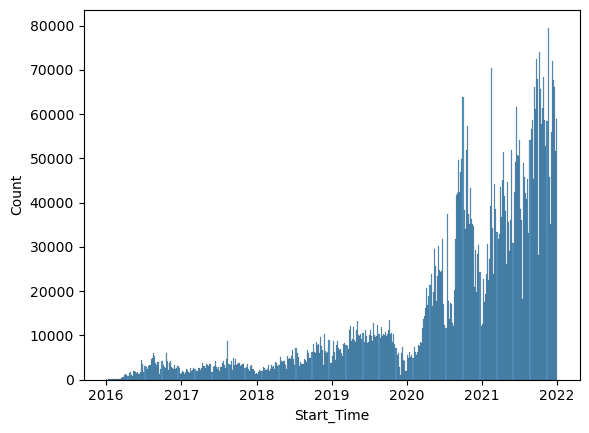

In [8]:
sns.histplot(pd.to_datetime(data['Start_Time']))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

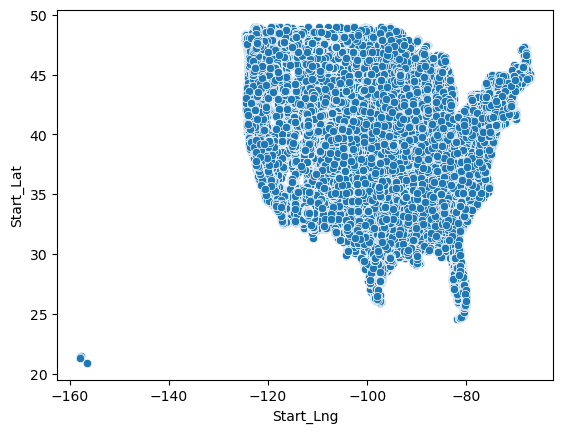

In [10]:
sns.scatterplot(data=data, x='Start_Lng', y='Start_Lat')

# Data Preparation

See Data Preparation Demo notebook for more detail on these methods.

In [6]:
def to_datetime(df):
    out = df.copy()
    out['Start_Time'] = pd.to_datetime(df['Start_Time'])
    return out

def bin_places(df):
    out = df.copy()
    out['Start_Lng'] = np.trunc(df['Start_Lng']*25)/25
    out['Start_Lat'] = np.trunc(df['Start_Lat']*25)/25
    return out

def group_closures(df):
    return df.groupby(['Start_Lat', 'Start_Lng', pd.Grouper(key='Start_Time', axis=0, freq='15D', origin='2016-01-01')]).aggregate(
    {'ID':'count'})

def fill_times(df):
    # Unstacking and filling in NaNs with zeroes means there's a value for every date for each place after restacking
    # There are 147 times for each place - 146 after dropping the 12/30 period (since it's only two days long)
    out = df.unstack().fillna(0).stack().reset_index()
    return out[out['Start_Time']!='2021-12-30']

# Takes lng and lat and returns a dataframe with average temp and precipitation for that place with a row for each time
def get_weather(lat, lng):
    error_index = Daily(Point(49.00,98), datetime.datetime(2016, 1, 1), datetime.datetime(2021, 12, 31)).fetch().reset_index().groupby(pd.Grouper(key='time', axis=0, freq='15D')).aggregate({'tavg':'mean', 'prcp':'mean'}).iloc[:146,:].index    
    #fetch weather data for each time period for the specified point, dropping the last row (date 12-30)
    weather_data = Daily(Point(lat, lng), datetime.datetime(2016, 1, 1), datetime.datetime(2021, 12, 31)).fetch()
    try:
        out = round(weather_data.reset_index().groupby(pd.Grouper(key='time', axis=0, freq='15D')).aggregate({'tavg':'mean', 'prcp':'mean'}).iloc[:146,:], 2)
    except:
        out = pd.DataFrame(np.nan, index= error_index, columns = ['tavg', 'prcp'])
    return out

def add_weather(df):
    out = pd.DataFrame(columns=['Start_Lat', 'Start_Lng', 'Start_Time', 'ID', 'tavg',
       'prcp'])
    for lat in df['Start_Lat'].unique(): #loop through unique lat values
        for lng in df[df['Start_Lat']==lat]['Start_Lng'].unique():
            places = df.loc[(df['Start_Lat']==lat) & (df['Start_Lng']==lng)]
            weather_df = pd.merge(places, get_weather(lat, lng), left_on='Start_Time', right_on='time')
            out = pd.concat([out, weather_df])
    return out

#input: a df of aggregated info for time/places. 
# Create input df by groupby object (first long/lat, then time bin) and aggregating.  
def create_history(df):
    col_names = ['Lat', 'Lng', 'Date', 'Close_Count', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
    out = []
    dates = df['Start_Time'].unique()
    for lat in df['Start_Lat'].unique(): #loop through unique lat values
        for lng in df[df['Start_Lat']==lat]['Start_Lng'].unique(): #loop through each unique long for that lat value (to find long/lat pairs)
            places = df.loc[(df['Start_Lat']==lat) & (df['Start_Lng']==lng)].sort_values('Start_Time').reset_index()
            for index, row in places.iterrows(): #iterate through dates for that lat/long pair
                if row['Start_Time'] > pd.Timestamp('2016-05-29'): #eliminate rows without 10 preceding dates
                    #create df row to concat onto result df
                    add = [lat, lng, row['Start_Time'], row['ID'], 
                                        places.iloc[index-1]['ID'], places.iloc[index-2]['ID'], places.iloc[index-3]['ID'], 
                                        places.iloc[index-4]['ID'], places.iloc[index-5]['ID'], places.iloc[index-6]['ID'],
                                        places.iloc[index-7]['ID'], places.iloc[index-8]['ID'],places.iloc[index-9]['ID'],
                                        places.iloc[index-10]['ID'],
                                        places.iloc[index-1]['tavg'], places.iloc[index-2]['tavg'], places.iloc[index-3]['tavg'], 
                                        places.iloc[index-4]['tavg'], places.iloc[index-5]['tavg'], places.iloc[index-6]['tavg'],
                                        places.iloc[index-7]['tavg'], places.iloc[index-8]['tavg'], places.iloc[index-9]['tavg'],
                                        places.iloc[index-10]['tavg'],
                                        places.iloc[index-1]['prcp'], places.iloc[index-2]['prcp'], places.iloc[index-3]['prcp'], 
                                        places.iloc[index-4]['prcp'], places.iloc[index-5]['prcp'], places.iloc[index-6]['prcp'],
                                        places.iloc[index-7]['prcp'], places.iloc[index-8]['prcp'], places.iloc[index-9]['prcp'],
                                        places.iloc[index-10]['prcp']]
                    out.append(add)
    return pd.DataFrame(out, columns=col_names)

## Select Cities

Reasons to prioritize big cities:
* Sample will better match population the model would actually be used for (unlikely small towns would use this)
* Better weather data (weather data is pretty spotty outside of major cities - including along major highways (585/700 on I-70 W)
* Computing restraints

In [7]:
big_city_groups = data.groupby(['City', 'State']).count().sort_values(by='ID', ascending=False)
big_city_groups[:50]

,,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,County,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
City,State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Phoenix,AZ,251549,251549,251549,251549,251549,251549,249154,249154,251549,251549,230012,251549,251549,251549,251549,251549,251549,251549,249270,249171,244710,249048,249116,249161,247494,246695,246505,249167,251549,251549,251549,251549,251549,251549,251549,251549,251549,251549,251549,251549,251549,251549,251549,251549,251549
New York,NY,164416,164416,164416,164416,164416,164416,158251,158251,164416,164416,121807,164416,164416,164416,164416,164416,164416,164416,163367,162666,124377,162659,159616,161433,141456,133944,142585,161631,164416,164416,164416,164416,164416,164416,164416,164416,164416,164416,164416,164416,164416,164416,164416,164416,164416
Miami,FL,163533,163533,163533,163533,163533,163533,159013,159013,163533,163533,123744,163533,163533,163533,163533,163533,163533,163533,163483,163096,149459,163011,163402,162669,162809,161349,151526,162989,163533,163533,163533,163533,163533,163533,163533,163533,163533,163533,163533,163533,163533,163533,163533,163533,163533
Brooklyn,NY,78186,78186,78186,78186,78186,78186,74608,74608,78186,78186,54658,78186,78186,78186,78186,78186,78186,78186,77823,77525,64976,77519,76854,77013,67728,66878,74118,77375,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186
Chicago,IL,71090,71090,71090,71090,71090,71090,69891,69891,71090,71090,40596,71090,71090,71090,71090,71090,71090,71090,71059,71058,68225,71048,71059,71059,71019,70772,67008,71059,71090,71090,71090,71090,71090,71090,71090,71090,71090,71090,71090,71090,71090,71090,71090,71090,71090
Denver,CO,67982,67982,67982,67982,67982,67982,61596,61596,67982,67982,43110,67982,67982,67982,67982,67982,67982,67982,67871,67864,64856,67844,67871,67869,67398,66440,63299,67864,67982,67982,67982,67982,67982,67982,67982,67982,67982,67982,67982,67982,67982,67982,67982,67982,67982
Houston,TX,51366,51366,51366,51366,51366,51366,49532,49532,51366,51366,23052,51366,51366,51366,51366,51366,51366,51366,51226,51203,45688,51195,51211,51218,50889,49752,45902,51209,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366,51366
Bronx,NY,49918,49918,49918,49918,49918,49918,45883,45883,49918,49918,26556,49918,49918,49918,49918,49918,49918,49918,49872,49872,46810,49872,49870,49869,49836,49716,45867,49871,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918
Orlando,FL,44044,44044,44044,44044,44044,44044,41906,41906,44044,44044,27693,44044,44044,44044,44044,44044,44044,44044,43843,43750,39315,43750,43779,43814,43659,43162,39833,43821,44044,44044,44044,44044,44044,44044,44044,44044,44044,44044,44044,44044,44044,44044,44044,44044,44044


In [8]:
big_city_list = big_city_groups.index[:50].to_list()
big_city_list

[('Phoenix', 'AZ'),
 ('New York', 'NY'),
 ('Miami', 'FL'),
 ('Brooklyn', 'NY'),
 ('Chicago', 'IL'),
 ('Denver', 'CO'),
 ('Houston', 'TX'),
 ('Bronx', 'NY'),
 ('Orlando', 'FL'),
 ('Fort Lauderdale', 'FL'),
 ('Atlanta', 'GA'),
 ('Los Angeles', 'CA'),
 ('Pittsburgh', 'PA'),
 ('Philadelphia', 'PA'),
 ('Dallas', 'TX'),
 ('Tampa', 'FL'),
 ('Pompano Beach', 'FL'),
 ('Minneapolis', 'MN'),
 ('Hialeah', 'FL'),
 ('Seattle', 'WA'),
 ('Tempe', 'AZ'),
 ('Miami Beach', 'FL'),
 ('Buffalo Grove', 'IL'),
 ('Fort Worth', 'TX'),
 ('Jacksonville', 'FL'),
 ('Portland', 'OR'),
 ('Meridian', 'ID'),
 ('Mesa', 'AZ'),
 ('Avon', 'IN'),
 ('Washington', 'DC'),
 ('Detroit', 'MI'),
 ('Columbus', 'OH'),
 ('Saint Petersburg', 'FL'),
 ('North Miami Beach', 'FL'),
 ('Indianapolis', 'IN'),
 ('Baton Rouge', 'LA'),
 ('Largo', 'FL'),
 ('San Antonio', 'TX'),
 ('San Diego', 'CA'),
 ('Staten Island', 'NY'),
 ('Oklahoma City', 'OK'),
 ('Harrisburg', 'PA'),
 ('Scottsdale', 'AZ'),
 ('Tacoma', 'WA'),
 ('Ashland', 'OR'),
 ('Chandler

In [10]:
def get_big_cities(df):
    out = pd.DataFrame()
    for i in range(0,50):
        add = df[(df['City']==big_city_list[i][0]) & (df['State']==big_city_list[i][1])]
        out = pd.concat([out,add])
    return out

big_data = get_big_cities(data)
print(big_data.shape)
big_data.groupby(['City', 'State']).count()

(1810604, 47)


,,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,County,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
City,State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ashland,OR,13678,13678,13678,13678,13678,13678,13650,13650,13678,13678,278,13678,13678,13678,13678,13678,13678,13678,13677,13670,13522,13670,13677,13672,13592,13550,13599,13672,13678,13678,13678,13678,13678,13678,13678,13678,13678,13678,13678,13678,13678,13678,13678,13678,13678
Atlanta,GA,43070,43070,43070,43070,43070,43070,37579,37579,43070,43070,22298,43070,43070,43070,43070,43070,43070,43068,43039,43019,34939,43015,43033,43026,42818,40183,34321,43008,43070,43070,43070,43070,43070,43070,43070,43070,43070,43070,43070,43070,43070,43070,43070,43070,43070
Aurora,CO,13328,13328,13328,13328,13328,13328,12740,12740,13328,13328,9501,13328,13328,13328,13328,13328,13328,13328,13320,13320,12897,13320,13320,13320,13319,13262,12739,13320,13328,13328,13328,13328,13328,13328,13328,13328,13328,13328,13328,13328,13328,13328,13328,13328,13328
Avon,IN,18467,18467,18467,18467,18467,18467,18445,18445,18467,18467,16741,18467,18467,18467,18467,18467,18467,18467,18467,18467,18333,18467,18467,18467,18355,18345,18365,18467,18467,18467,18467,18467,18467,18467,18467,18467,18467,18467,18467,18467,18467,18467,18467,18467,18467
Baton Rouge,LA,15544,15544,15544,15544,15544,15544,14533,14533,15544,15544,10523,15544,15544,15544,15544,15544,15544,15544,15541,15474,14514,15474,15525,15499,15394,15202,14683,15498,15544,15544,15544,15544,15544,15544,15544,15544,15544,15544,15544,15544,15544,15544,15544,15544,15544
Bronx,NY,49918,49918,49918,49918,49918,49918,45883,45883,49918,49918,26556,49918,49918,49918,49918,49918,49918,49918,49872,49872,46810,49872,49870,49869,49836,49716,45867,49871,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918,49918
Brooklyn,NY,78186,78186,78186,78186,78186,78186,74608,74608,78186,78186,54658,78186,78186,78186,78186,78186,78186,78186,77823,77525,64976,77519,76854,77013,67728,66878,74118,77375,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186,78186
Buffalo Grove,IL,23086,23086,23086,23086,23086,23086,22903,22903,23086,23086,21577,23086,23086,23086,23086,23086,23086,23086,23062,23043,22826,23043,23052,22992,22940,22913,22932,23052,23086,23086,23086,23086,23086,23086,23086,23086,23086,23086,23086,23086,23086,23086,23086,23086,23086
Chandler,AZ,13580,13580,13580,13580,13580,13580,13290,13290,13580,13580,8909,13580,13580,13580,13580,13580,13580,13580,13573,13565,13185,13540,13571,13573,13571,13457,0,13573,13580,13580,13580,13580,13580,13580,13580,13580,13580,13580,13580,13580,13580,13580,13580,13580,13580


## Add Weather

In [11]:
big_data = fill_times(group_closures(bin_places(to_datetime(big_data))))

In [12]:
%time big_weather = add_weather(big_data)

Wall time: 5min 37s


In [13]:
big_weather

,Start_Lat,Start_Lng,Start_Time,ID,tavg,prcp
0,25.52,-80.44,2016-01-01,0.0,20.38,6.25
1,25.52,-80.44,2016-01-16,0.0,18.00,6.45
2,25.52,-80.44,2016-01-31,0.0,18.50,1.96
3,25.52,-80.44,2016-02-15,0.0,20.40,2.33
4,25.52,-80.44,2016-03-01,0.0,22.88,0.00
...,...,...,...,...,...,...
141,47.76,-122.28,2021-10-16,4.0,10.83,5.74
142,47.76,-122.28,2021-10-31,2.0,9.05,7.41
143,47.76,-122.28,2021-11-15,5.0,7.13,4.83
144,47.76,-122.28,2021-11-30,6.0,5.19,4.49


In [51]:
big_weather = big_weather.reset_index(drop=True)

## Address Missing Values

In [52]:
big_weather.isna().sum()

Start_Lat        0
Start_Lng        0
Start_Time       0
ID               0
tavg          2580
prcp          3809
dtype: int64

In [53]:
#all the tavg nans occur when there's also a prcp nan
big_weather[big_weather['prcp'].isna()].isna().sum()

Start_Lat        0
Start_Lng        0
Start_Time       0
ID               0
tavg          2580
prcp          3809
dtype: int64

In [54]:
pd.options.display.max_rows=70
nan_df = big_weather[big_weather['prcp'].isna()].groupby(['Start_Lat','Start_Lng']).count()
nan_df

Start_Time   ID  tavg  prcp
Start_Lat Start_Lng                             
25.76     -80.80            146  146     0     0
          -80.72              1    1     1     0
25.80     -80.84            146  146     0     0
27.92     -82.32            121  121   121     0
28.12     -82.32            120  120   120     0
          -82.28            120  120   120     0
          -82.24            120  120   120     0
29.64     -95.64              1    1     1     0
          -95.60              1    1     1     0
29.68     -95.68              1    1     1     0
          -95.64              1    1     1     0
          -95.60              1    1     1     0
          -95.56              1    1     1     0
29.72     -95.68              1    1     1     0
          -95.64              1    1     1     0
          -95.60              1    1     1     0
          -95.56              1    1     1     0
29.76     -95.68              1    1     1     0
30.12     -82.00             10   10    10     0
30.52     -91.20            119  119   105     0
30.56     -91.20            119  119   105     0
33.12     -111.84           121  121   107     0
33.16     -111.84           121  121   107     0
33.20     -111.76           121  121   107     0
          -111.72            68   68    54     0
33.24     -111.64            68   68    54     0
33.72     -111.48           146  146     0     0
33.76     -111.48           146  146     0     0
33.84     -111.44           146  146     0     0
33.88     -111.44           146  146     0     0
33.92     -111.44           146  146     0     0
42.12     -122.64           146  146     0     0
          -122.60           146  146     0     0
          -122.56           146  146     0     0
          -122.52           146  146     0     0
          -122.48           146  146     0     0
          -122.44           146  146     0     0
          -122.32           146  146     0     0
42.24     -122.48           146  146     0     0
42.36     -122.32           146  146     0     0
          -122.28           146  146     0     0
47.00     -122.48             3    3     3     0
47.04     -122.48             3    3     3     0
          -122.44             3    3     3     0
47.08     -122.60             3    3     3     0
          -122.56             3    3     3     0
          -122.52             3    3     3     0
          -122.40             3    3     3     0
          -122.36             3    3     3     0
47.12     -122.60             3    3     3     0
          -122.52             3    3     3     0
          -122.44             3    3     3     0
          -122.40             3    3     3     0
          -122.36             3    3     3     0
          -122.32             3    3     3     0
47.16     -122.44             3    3     3     0
          -122.40             3    3     3     0
          -122.36             3    3     3     0
          -122.32             3    3     3     0
47.20     -122.48             3    3     3     0
          -122.44             3    3     3     0
          -122.40             3    3     3     0
          -122.36             3    3     3     0
          -122.32             3    3     3     0
47.24     -122.52             3    3     3     0
          -122.48             3    3     3     0
          -122.44             3    3     3     0
          -122.40             3    3     3     0
          -122.36             3    3     3     0
          -122.32             3    3     3     0

In [55]:
pd.options.display.max_rows=10

In [56]:
nan_list = nan_df.index.to_list()
nan_list

[(25.76, -80.8),
 (25.76, -80.72),
 (25.8, -80.84),
 (27.92, -82.32),
 (28.12, -82.32),
 (28.12, -82.28),
 (28.12, -82.24),
 (29.64, -95.64),
 (29.64, -95.6),
 (29.68, -95.68),
 (29.68, -95.64),
 (29.68, -95.6),
 (29.68, -95.56),
 (29.72, -95.68),
 (29.72, -95.64),
 (29.72, -95.6),
 (29.72, -95.56),
 (29.76, -95.68),
 (30.12, -82.0),
 (30.52, -91.2),
 (30.56, -91.2),
 (33.12, -111.84),
 (33.16, -111.84),
 (33.2, -111.76),
 (33.2, -111.72),
 (33.24, -111.64),
 (33.72, -111.48),
 (33.76, -111.48),
 (33.84, -111.44),
 (33.88, -111.44),
 (33.92, -111.44),
 (42.12, -122.64),
 (42.12, -122.6),
 (42.12, -122.56),
 (42.12, -122.52),
 (42.12, -122.48),
 (42.12, -122.44),
 (42.12, -122.32),
 (42.24, -122.48),
 (42.36, -122.32),
 (42.36, -122.28),
 (47.0, -122.48),
 (47.04, -122.48),
 (47.04, -122.44),
 (47.08, -122.6),
 (47.08, -122.56),
 (47.08, -122.52),
 (47.08, -122.4),
 (47.08, -122.36),
 (47.12, -122.6),
 (47.12, -122.52),
 (47.12, -122.44),
 (47.12, -122.4),
 (47.12, -122.36),
 (47.12, -1

In [64]:
#Removes all time rows for each place with nan data
def drop_nans(df):
    out = df.copy()
    for i in range(0,70):        
        drop_index = out[(out['Start_Lat']==nan_list[i][0]) & (out['Start_Lng']==nan_list[i][1])].index
        out = out.drop(index=drop_index)
    return out

In [68]:
# 306892-296672 = 10220/146 = 70, so 146 times have been removed for each of 70 places with nans in their data
big_weather = drop_nans(big_weather)

In [69]:
big_weather

,Start_Lat,Start_Lng,Start_Time,ID,tavg,prcp
0,25.52,-80.44,2016-01-01,0.0,20.38,6.25
1,25.52,-80.44,2016-01-16,0.0,18.00,6.45
2,25.52,-80.44,2016-01-31,0.0,18.50,1.96
3,25.52,-80.44,2016-02-15,0.0,20.40,2.33
4,25.52,-80.44,2016-03-01,0.0,22.88,0.00
...,...,...,...,...,...,...
306887,47.76,-122.28,2021-10-16,4.0,10.83,5.74
306888,47.76,-122.28,2021-10-31,2.0,9.05,7.41
306889,47.76,-122.28,2021-11-15,5.0,7.13,4.83
306890,47.76,-122.28,2021-11-30,6.0,5.19,4.49


In [70]:
# nans successfully removed
big_weather.isna().sum()

Start_Lat     0
Start_Lng     0
Start_Time    0
ID            0
tavg          0
prcp          0
dtype: int64

## Create History

In [71]:
%time big_history = create_history(big_weather)

Wall time: 19min 22s


In [72]:
big_history

,Lat,Lng,Date,Close_Count,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,25.52,-80.44,2016-05-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.73,25.03,24.42,23.83,23.53,22.88,20.40,18.50,18.00,20.38,7.29,6.43,0.07,0.19,0.43,0.00,2.33,1.96,6.45,6.25
1,25.52,-80.44,2016-06-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.52,26.73,25.03,24.42,23.83,23.53,22.88,20.40,18.50,18.00,5.80,7.29,6.43,0.07,0.19,0.43,0.00,2.33,1.96,6.45
2,25.52,-80.44,2016-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.91,27.52,26.73,25.03,24.42,23.83,23.53,22.88,20.40,18.50,5.45,5.80,7.29,6.43,0.07,0.19,0.43,0.00,2.33,1.96
3,25.52,-80.44,2016-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.98,27.91,27.52,26.73,25.03,24.42,23.83,23.53,22.88,20.40,4.86,5.45,5.80,7.29,6.43,0.07,0.19,0.43,0.00,2.33
4,25.52,-80.44,2016-07-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.69,28.98,27.91,27.52,26.73,25.03,24.42,23.83,23.53,22.88,3.14,4.86,5.45,5.80,7.29,6.43,0.07,0.19,0.43,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276347,47.76,-122.28,2021-10-16,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,9.91,13.71,16.27,15.53,19.48,17.97,16.77,20.76,14.01,13.42,3.01,5.85,0.28,0.52,0.89,0.06,0.00,0.00,4.06,0.79
276348,47.76,-122.28,2021-10-31,2.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,10.83,9.91,13.71,16.27,15.53,19.48,17.97,16.77,20.76,14.01,5.74,3.01,5.85,0.28,0.52,0.89,0.06,0.00,0.00,4.06
276349,47.76,-122.28,2021-11-15,5.0,2.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,9.05,10.83,9.91,13.71,16.27,15.53,19.48,17.97,16.77,20.76,7.41,5.74,3.01,5.85,0.28,0.52,0.89,0.06,0.00,0.00
276350,47.76,-122.28,2021-11-30,6.0,5.0,2.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,7.13,9.05,10.83,9.91,13.71,16.27,15.53,19.48,17.97,16.77,4.83,7.41,5.74,3.01,5.85,0.28,0.52,0.89,0.06,0.00


In [73]:
#weather lines up correctly for last place in df
weather_data = Daily(Point(47.76, -122.28), datetime.datetime(2016, 1, 1), datetime.datetime(2021, 12, 31)).fetch()
round(weather_data.reset_index().groupby(pd.Grouper(key='time', axis=0, freq='15D')).aggregate({'tavg':'mean', 'prcp':'mean'}).iloc[:146,:], 2)

,tavg,prcp
time,,
2016-01-01,4.08,2.97
2016-01-16,7.72,10.25
2016-01-31,7.62,5.19
2016-02-15,8.53,4.85
2016-03-01,8.04,7.57
...,...,...
2021-10-16,10.83,5.74
2021-10-31,9.05,7.41
2021-11-15,7.13,4.83


In [74]:
big_history.to_csv('C:/Users/ryana/Downloads/constructiondata/big_history.csv')

# Prepared Data Exploration

## Full Prepared Dataset

In [12]:
big_history

,Lat,Lng,Date,Close_Count,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,25.52,-80.44,2016-05-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.73,25.03,24.42,23.83,23.53,22.88,20.40,18.50,18.00,20.38,7.29,6.43,0.07,0.19,0.43,0.00,2.33,1.96,6.45,6.25
1,25.52,-80.44,2016-06-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.52,26.73,25.03,24.42,23.83,23.53,22.88,20.40,18.50,18.00,5.80,7.29,6.43,0.07,0.19,0.43,0.00,2.33,1.96,6.45
2,25.52,-80.44,2016-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.91,27.52,26.73,25.03,24.42,23.83,23.53,22.88,20.40,18.50,5.45,5.80,7.29,6.43,0.07,0.19,0.43,0.00,2.33,1.96
3,25.52,-80.44,2016-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.98,27.91,27.52,26.73,25.03,24.42,23.83,23.53,22.88,20.40,4.86,5.45,5.80,7.29,6.43,0.07,0.19,0.43,0.00,2.33
4,25.52,-80.44,2016-07-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.69,28.98,27.91,27.52,26.73,25.03,24.42,23.83,23.53,22.88,3.14,4.86,5.45,5.80,7.29,6.43,0.07,0.19,0.43,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276347,47.76,-122.28,2021-10-16,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,9.91,13.71,16.27,15.53,19.48,17.97,16.77,20.76,14.01,13.42,3.01,5.85,0.28,0.52,0.89,0.06,0.00,0.00,4.06,0.79
276348,47.76,-122.28,2021-10-31,2.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,10.83,9.91,13.71,16.27,15.53,19.48,17.97,16.77,20.76,14.01,5.74,3.01,5.85,0.28,0.52,0.89,0.06,0.00,0.00,4.06
276349,47.76,-122.28,2021-11-15,5.0,2.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,9.05,10.83,9.91,13.71,16.27,15.53,19.48,17.97,16.77,20.76,7.41,5.74,3.01,5.85,0.28,0.52,0.89,0.06,0.00,0.00
276350,47.76,-122.28,2021-11-30,6.0,5.0,2.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,7.13,9.05,10.83,9.91,13.71,16.27,15.53,19.48,17.97,16.77,4.83,7.41,5.74,3.01,5.85,0.28,0.52,0.89,0.06,0.00


<AxesSubplot:xlabel='Lng', ylabel='Lat'>

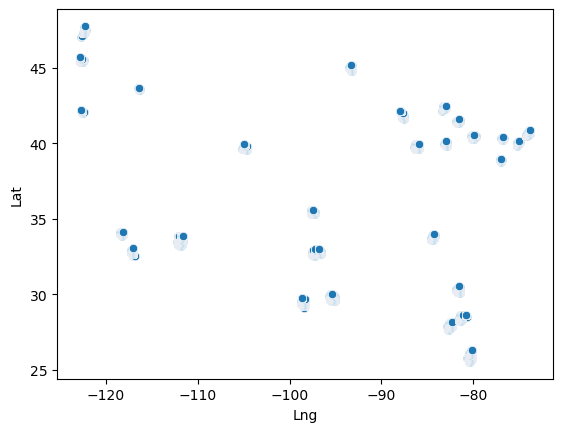

In [38]:
sns.scatterplot(data=big_history, x='Lng', y='Lat')

## Closure and Non-closure Rows

In [16]:
closures = big_history[big_history['Close_Count']==1]
closures

,Lat,Lng,Date,Close_Count,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
50,25.52,-80.44,2018-06-19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.07,26.21,25.33,25.01,24.12,22.00,20.01,23.28,23.51,21.29,9.89,18.03,8.64,5.41,0.19,0.12,0.32,0.35,0.00,0.37
84,25.52,-80.44,2019-11-11,1.0,2.0,7.0,3.0,5.0,7.0,5.0,0.0,0.0,0.0,0.0,26.73,27.61,27.15,27.55,28.89,28.07,27.85,28.49,28.29,28.03,0.56,1.80,4.63,3.45,4.17,6.67,16.63,6.46,9.47,11.57
85,25.52,-80.44,2019-11-26,1.0,1.0,2.0,7.0,3.0,5.0,7.0,5.0,0.0,0.0,0.0,21.43,26.73,27.61,27.15,27.55,28.89,28.07,27.85,28.49,28.29,1.91,0.56,1.80,4.63,3.45,4.17,6.67,16.63,6.46,9.47
98,25.52,-80.44,2020-06-08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,27.53,25.81,25.07,27.17,24.41,24.15,21.11,23.45,19.73,21.17,30.63,7.58,2.76,2.34,0.20,0.02,0.73,1.61,5.27,0.79
239,25.52,-80.40,2020-08-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.13,28.42,27.70,28.80,27.57,27.53,25.81,25.07,27.17,24.41,0.91,8.17,11.18,3.44,6.27,30.63,7.58,2.76,2.34,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276337,47.76,-122.28,2021-05-19,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,3.0,0.0,12.03,11.39,9.51,6.94,6.69,5.86,2.53,4.55,6.81,5.75,0.72,1.45,1.32,1.87,1.91,2.48,3.53,4.83,6.99,9.66
276342,47.76,-122.28,2021-08-02,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,17.97,16.77,20.76,14.01,13.42,12.03,11.39,9.51,6.94,6.69,0.06,0.00,0.00,4.06,0.79,0.72,1.45,1.32,1.87,1.91
276345,47.76,-122.28,2021-09-16,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,16.27,15.53,19.48,17.97,16.77,20.76,14.01,13.42,12.03,11.39,0.28,0.52,0.89,0.06,0.00,0.00,4.06,0.79,0.72,1.45
276346,47.76,-122.28,2021-10-01,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,13.71,16.27,15.53,19.48,17.97,16.77,20.76,14.01,13.42,12.03,5.85,0.28,0.52,0.89,0.06,0.00,0.00,4.06,0.79,0.72


In [35]:
closures.describe()

,Lat,Lng,Close_Count,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
count,21570.000000,21570.000000,21570.0,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000
mean,35.579755,-93.229239,1.0,1.578442,1.938665,2.341493,2.341817,2.387807,2.509736,2.556143,2.508901,2.582847,2.594576,17.707073,17.764284,17.792390,17.797176,17.715997,17.631450,17.530401,17.396663,17.245017,17.093234,2.688884,2.682889,2.679562,2.676121,2.722952,2.693873,2.647262,2.646366,2.615269,2.626523
std,5.876066,14.053213,0.0,8.038694,12.178430,18.219374,16.402613,16.037578,17.125899,16.565889,16.314723,17.189125,18.751276,8.966856,9.004148,9.059176,9.100701,9.139234,9.160472,9.180033,9.216448,9.232193,9.278938,3.459519,3.267192,3.233219,3.278143,3.545035,3.613152,3.196810,3.485730,3.443303,3.468120
min,25.520000,-122.880000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.260000,-18.260000,-18.260000,-18.260000,-18.260000,-18.150000,-18.260000,-18.150000,-18.260000,-18.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.920000,-98.520000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.740000,11.850000,11.990000,11.910000,11.740000,11.570000,11.190000,11.070000,10.850000,10.652500,0.390000,0.410000,0.400000,0.410000,0.420000,0.390000,0.380000,0.380000,0.370000,0.350000
50%,33.960000,-87.720000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.530000,19.630000,19.610000,19.595000,19.460000,19.210000,19.190000,18.945000,18.850000,18.635000,1.680000,1.750000,1.730000,1.690000,1.700000,1.690000,1.700000,1.670000,1.630000,1.640000
75%,40.400000,-81.640000,1.0,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.670000,24.720000,24.770000,24.810000,24.780000,24.810000,24.630000,24.570000,24.500000,24.350000,3.840000,3.810000,3.910000,3.850000,3.850000,3.847500,3.830000,3.810000,3.730000,3.730000
max,47.760000,-73.760000,1.0,678.000000,958.000000,1147.000000,1110.000000,1147.000000,1110.000000,965.000000,796.000000,1043.000000,974.000000,38.260000,38.260000,38.030000,38.260000,38.260000,38.030000,38.260000,38.260000,38.260000,38.260000,97.870000,97.870000,97.870000,97.870000,158.430000,158.430000,62.670000,158.430000,158.430000,97.870000


In [33]:
non_closures = big_history[big_history['Close_Count']==0]
non_closures

,Lat,Lng,Date,Close_Count,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,25.52,-80.44,2016-05-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.73,25.03,24.42,23.83,23.53,22.88,20.40,18.50,18.00,20.38,7.29,6.43,0.07,0.19,0.43,0.00,2.33,1.96,6.45,6.25
1,25.52,-80.44,2016-06-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.52,26.73,25.03,24.42,23.83,23.53,22.88,20.40,18.50,18.00,5.80,7.29,6.43,0.07,0.19,0.43,0.00,2.33,1.96,6.45
2,25.52,-80.44,2016-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.91,27.52,26.73,25.03,24.42,23.83,23.53,22.88,20.40,18.50,5.45,5.80,7.29,6.43,0.07,0.19,0.43,0.00,2.33,1.96
3,25.52,-80.44,2016-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.98,27.91,27.52,26.73,25.03,24.42,23.83,23.53,22.88,20.40,4.86,5.45,5.80,7.29,6.43,0.07,0.19,0.43,0.00,2.33
4,25.52,-80.44,2016-07-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.69,28.98,27.91,27.52,26.73,25.03,24.42,23.83,23.53,22.88,3.14,4.86,5.45,5.80,7.29,6.43,0.07,0.19,0.43,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276336,47.76,-122.28,2021-05-04,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,3.0,0.0,4.0,11.39,9.51,6.94,6.69,5.86,2.53,4.55,6.81,5.75,7.00,1.45,1.32,1.87,1.91,2.48,3.53,4.83,6.99,9.66,4.89
276340,47.76,-122.28,2021-07-03,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,20.76,14.01,13.42,12.03,11.39,9.51,6.94,6.69,5.86,2.53,0.00,4.06,0.79,0.72,1.45,1.32,1.87,1.91,2.48,3.53
276341,47.76,-122.28,2021-07-18,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,16.77,20.76,14.01,13.42,12.03,11.39,9.51,6.94,6.69,5.86,0.00,0.00,4.06,0.79,0.72,1.45,1.32,1.87,1.91,2.48
276343,47.76,-122.28,2021-08-17,0.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,19.48,17.97,16.77,20.76,14.01,13.42,12.03,11.39,9.51,6.94,0.89,0.06,0.00,0.00,4.06,0.79,0.72,1.45,1.32,1.87


In [36]:
non_closures.describe()

,Lat,Lng,Close_Count,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
count,198987.000000,198987.000000,198987.0,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000,198987.000000
mean,34.971013,-94.138756,0.0,0.368461,0.491645,0.554066,0.585787,0.632624,0.649495,0.668953,0.669285,0.652148,0.669139,18.087404,18.140185,18.203890,18.228782,18.244451,18.232509,18.192817,18.111043,18.001325,17.872036,2.549889,2.562246,2.573883,2.570227,2.555042,2.543575,2.539048,2.521237,2.519955,2.513465
std,5.940841,13.694032,0.0,7.955178,8.241530,8.877169,6.286635,6.989227,7.031748,7.047503,7.701014,7.385743,7.253392,9.179815,9.122607,9.059002,9.019432,8.994486,8.976486,8.973656,8.994434,9.042849,9.099450,3.446590,3.487823,3.482043,3.505752,3.465333,3.451708,3.447724,3.441185,3.445578,3.440291
min,25.520000,-122.880000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.260000,-18.260000,-18.260000,-18.260000,-18.260000,-18.260000,-18.260000,-18.260000,-18.260000,-18.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.720000,-98.680000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.270000,12.410000,12.550000,12.630000,12.670000,12.650000,12.600000,12.520000,12.380000,12.160000,0.270000,0.270000,0.270000,0.270000,0.270000,0.270000,0.270000,0.270000,0.270000,0.270000
50%,33.560000,-95.080000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.810000,19.860000,19.930000,19.990000,20.010000,19.950000,19.870000,19.730000,19.590000,19.480000,1.490000,1.490000,1.500000,1.500000,1.490000,1.470000,1.470000,1.470000,1.450000,1.460000
75%,40.040000,-81.760000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.320000,25.290000,25.250000,25.210000,25.190000,25.150000,25.110000,25.060000,24.980000,24.890000,3.670000,3.690000,3.710000,3.710000,3.690000,3.660000,3.650000,3.640000,3.640000,3.630000
max,47.760000,-73.760000,0.0,3203.000000,2636.000000,2927.000000,1043.000000,1043.000000,748.000000,1043.000000,1147.000000,1110.000000,819.000000,38.260000,38.260000,38.260000,38.260000,38.260000,38.260000,38.260000,38.260000,38.260000,38.260000,158.430000,158.430000,158.430000,158.430000,158.430000,158.430000,158.430000,158.430000,158.430000,158.430000


<AxesSubplot:ylabel='Count'>

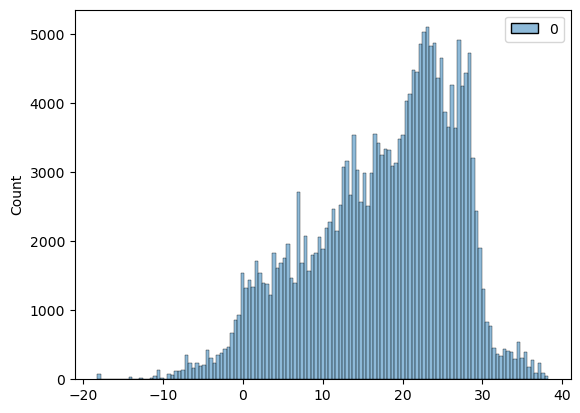

In [43]:
# closure past temperatures
sns.histplot(data=closures.iloc[:,14:24].to_numpy().reshape(-1,1))

<AxesSubplot:ylabel='Count'>

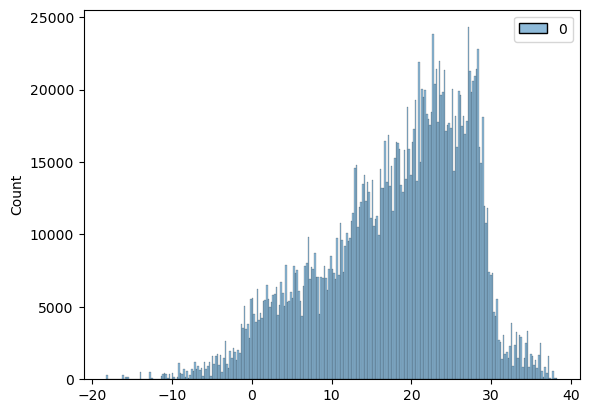

In [44]:
# non-closure past temperatures
sns.histplot(data=non_closures.iloc[:,14:24].to_numpy().reshape(-1,1))

<AxesSubplot:ylabel='Count'>

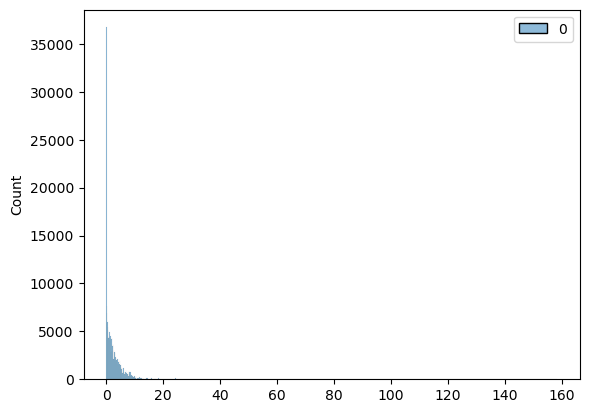

In [45]:
# closure past precipitation
sns.histplot(data=closures.iloc[:,24:].to_numpy().reshape(-1,1))

<AxesSubplot:ylabel='Count'>

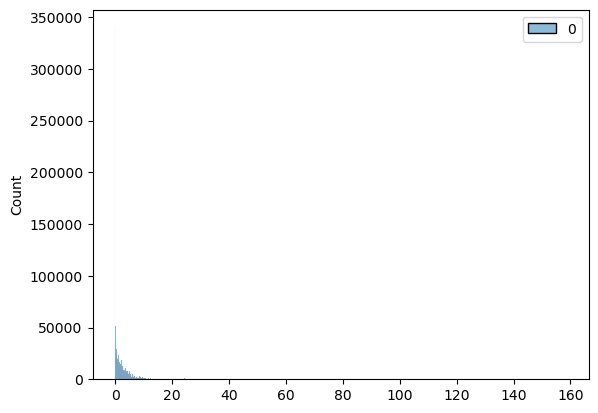

In [46]:
# closure past precipitation
sns.histplot(data=non_closures.iloc[:,24:].to_numpy().reshape(-1,1))